## Coursera Machine Learning for Data Analysis
### Week_1_Assignment

#### Intro
I decided to work with a famous dataset - the [Pima Indians Diabetes Database](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names), which gives you different parameters regarding Indian women's health and medical history, along with a label of having or not having diabetes.<br>
We'll run a decision tree analysis to see if we can predict having diabetes from the other indicators.

In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import os

#Displaying the decision tree
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
out = StringIO()
import pydotplus

In [2]:
# Pima Indian Diabetes dataset from the UCI Machine Learning Repository

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

print pima.shape

pima.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here is the codebook for the labels, by order of appearance - left to right:<br>
(copied directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names))
1. Number of times pregnant
+ Plasma glucose concentration a 2 hours in an oral glucose tolerance test
+ Diastolic blood pressure (mm Hg)
+ Triceps skin fold thickness (mm)
+ 2-Hour serum insulin (mu U/ml)
+ Body mass index (weight in kg/(height in m)^2)
+ Diabetes pedigree function
+ Age (years)
+ Class variable (0 or 1)


In [3]:
# let's check there are no missing values we need to handle

pima.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
# we can see that for all of the women in the study there are no null values for either parameter. Hooray!

In [5]:
# Some descriptive statistics:

pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# And now we'll look at how prevalent diabetes is at the first place.
# This will be useful to examine how well our model is doing.

pima['label'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: label, dtype: float64

We can see that 65% of women do not have diabetes.<br>
What this means is that if we always 'predict' 0 - no diabetes - our prediction would be right **65%** of the time. So, this is **the baseline to beat**.

** Let's do it! **

In [7]:
# Split to Target and Features
y = pima['label']

# Since 'label' is the last column on the right, we can easily create a list of features like so:
features = col_names[:-1]       # alternatively: list(pima.columns[:-1])
print features

# and use that to get the features DataFrame
X = pima.loc[:, features]
X.head()

['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print 'There are %d rows and %d columns in the training set.' % (X_train.shape[0], X_train.shape[1])
print 'There are %d rows and %d columns in the test set.' % (X_test.shape[0], X_test.shape[1])
print 'There are %d targets in the training set.' % y_train.shape[0]
print 'There are %d targets in the test set.' % y_test.shape[0]

There are 460 rows and 8 columns in the training set.
There are 308 rows and 8 columns in the test set.
There are 460 targets in the training set.
There are 308 targets in the test set.


In [9]:
# Instantiate the model
model = DecisionTreeClassifier(criterion='gini') # we'll start with 'gini' and maybe compare to information gain later.

# fit the model with the training data
model.fit(X_train, y_train)

# and make predictions on the test data
y_pred = model.predict(X_test)

# let's check our accuracy
sklearn.metrics.accuracy_score(y_test, y_pred)

0.68181818181818177

We see our accuracy (albeit based on one run) is better than the baseline, which is good! <br>
We'll try to improve on it and also have more robus results.

In [10]:
# print the confusion metrics:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[151,  57],
       [ 41,  59]])

In [11]:
print sklearn.metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.79      0.73      0.76       208
          1       0.51      0.59      0.55       100

avg / total       0.70      0.68      0.69       308



We see in the classification report that we're doing better at predicting 0 (no diabetes) than 1.

In [12]:
# Let's print the feature importance

for i in range(len(features)):
    print features[i], '    |    ', model.feature_importances_[i]

pregnant     |     0.126953316602
glucose     |     0.286433341046
bp     |     0.117600391964
skin     |     0.0374844745564
insulin     |     0.0495659110226
bmi     |     0.158973968726
pedigree     |     0.121915147152
age     |     0.101073448932


It's not surprising to see 'gluose' is the most important feature in predicting diabetes. 'Pregnant' and 'skin' are the least important.

In [13]:
# Before we visualize the tree, let's see how many nodes (including terminal leaves) there are in the tree:

model.tree_.node_count

165

There are 165 nodes, which would make visualiztion hard to follow.<br>
Let's see if we can get similar accuracy - or even better - with fewer nodes.

In [14]:
# First, let's establish what our accuracy score looks like.
# We'll run the classifier multiple times and average the results, to get a more robust estimate of how well it's
# doing. For that, let's write a function with the different steps, and loop through it multiple times.


def run_decision_tree_clf(X, y, test_size, criterion, max_depth, min_samples_split):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return sklearn.metrics.accuracy_score(y_test, y_pred)

scores = []
for i in range(200):
    scores.append(run_decision_tree_clf(X, y, test_size=0.4, criterion='gini', max_depth=None, min_samples_split=1))
    
pd.Series(scores).describe()

count    200.000000
mean       0.699318
std        0.024128
min        0.639610
25%        0.681818
50%        0.701299
75%        0.717532
max        0.775974
dtype: float64

In [15]:
# We see the mean score is just about 0.7, which is fairly close to what we god before.
# Can we do better with 'information gain' instead?

scores = []
for i in range(200):
    scores.append(run_decision_tree_clf(X, y, test_size=0.4, criterion='entropy', max_depth=None, min_samples_split=1))
    
pd.Series(scores).describe()

count    200.000000
mean       0.694334
std        0.024697
min        0.600649
25%        0.675325
50%        0.691558
75%        0.711039
max        0.753247
dtype: float64

We see using information gain / entropy as the criterion for the classifier doesn't do any better, so we'll continue with gini.

In [16]:
# Now, let's try to see if we can make the tree smaller without losing (and perhaps with gaining) model accuracy.

# first, let's try reducing the number of features to simplify the tree and see what happens.
# let's run the feature_importances_ method several times to get robust results.
# for that, we'll need to modify our function just a little.

def run_decision_tree_clf1(X, y, test_size, criterion, max_depth, min_samples_split):  # notice function's name
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.feature_importances_   # <---  what has changed



feature_importance = []

for i in range(200):
    feature_importance.append(run_decision_tree_clf1(X, y, test_size=0.4, criterion='gini', 
                                                          max_depth=None, min_samples_split=1))
    
pd.DataFrame(feature_importance, columns=features).mean()

pregnant    0.067450
glucose     0.327465
bp          0.087904
skin        0.048485
insulin     0.054675
bmi         0.164600
pedigree    0.126679
age         0.122742
dtype: float64

In [17]:
# We see that over 200 runs, skin, insuling and pregnant were the least important features, in that order.
# What will happen if we remove them?

features1 = ['glucose', 'bp', 'bmi', 'pedigree', 'age']

X1 = pima.loc[:, features1]

scores = []
for i in range(200):
    scores.append(run_decision_tree_clf(X1, y, test_size=0.4, criterion='gini', max_depth=None, min_samples_split=1))
    
pd.Series(scores).describe()

count    200.000000
mean       0.697208
std        0.026613
min        0.623377
25%        0.678571
50%        0.698052
75%        0.714286
max        0.772727
dtype: float64

In [18]:
# We didn't do any worse with fewer features, so let's stick with those features, just to make the tree more compact.

# Let's try to change different parameters and see if we can improve the accuracy just by keeping the tree smaller 
# (fighting overfitting)

# We'll start with the minimum number of sample to split

scores = []
for i in range(200):
    scores.append(run_decision_tree_clf(X1, y, test_size=0.4, criterion='gini', max_depth=None, min_samples_split=100))
    
pd.Series(scores).describe()

count    200.000000
mean       0.745276
std        0.024726
min        0.672078
25%        0.730519
50%        0.746753
75%        0.762987
max        0.805195
dtype: float64

In [19]:
# We are now doing a lot better! We gained about 4% in accuracy! Let's try a few more values to min_samples_split.

scores = []
for i in range(200):
    scores.append(run_decision_tree_clf(X1, y, test_size=0.4, criterion='gini', max_depth=None, min_samples_split=50))
    
pd.Series(scores).describe()

count    200.000000
mean       0.737386
std        0.024789
min        0.662338
25%        0.720779
50%        0.737013
75%        0.756494
max        0.788961
dtype: float64

In [20]:
scores = []
for i in range(200):
    scores.append(run_decision_tree_clf(X1, y, test_size=0.4, criterion='gini', max_depth=None, min_samples_split=150))
    
pd.Series(scores).describe()

count    200.000000
mean       0.737256
std        0.023383
min        0.659091
25%        0.720779
50%        0.738636
75%        0.753247
max        0.792208
dtype: float64

Looks like a good value for min_samples_split is 100 samples! Nice.<br>
Let's see how many nodes we have now (earlier we had 169).

In [21]:
def run_decision_tree_clf2(X, y, test_size, criterion, max_depth, min_samples_split):  # notice function's name
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.tree_.node_count   # <---  what has changed



num_nodes = []

for i in range(200):
    num_nodes.append(run_decision_tree_clf2(X1, y, test_size=0.4, criterion='gini', 
                                                          max_depth=None, min_samples_split=100))
    
pd.Series(num_nodes).mean()

16.370000000000001

We see we get better accuracy than before, with about 10% of the nodes! Awesome square!

In [22]:
# Finally, let's experiment with the max_depth parameter.


scores = {}
for i in range(2, 16):
    accuracy = []
    for j in range(200):
        accuracy.append(run_decision_tree_clf(X1, y, test_size=0.4, criterion='gini', 
                                              max_depth=i, min_samples_split=100))
    mean_accuracy = pd.Series(accuracy).mean()
    scores[i] = mean_accuracy

scores

{2: 0.73892857142857138,
 3: 0.73545454545454547,
 4: 0.74001623376623371,
 5: 0.74316558441558445,
 6: 0.74185064935064926,
 7: 0.74089285714285713,
 8: 0.74344155844155835,
 9: 0.74279220779220778,
 10: 0.74215909090909093,
 11: 0.74025974025974017,
 12: 0.74470779220779237,
 13: 0.74454545454545451,
 14: 0.74189935064935075,
 15: 0.74725649350649348}

Well, it doesn't look like there's a lot of difference when we change max_depth. It's likely b/c the min_samples_split is taking over. When I ran it withat any restrictions on the split, I got results lower than 74%, so let's keep the min_samples_split and take max_depth of 8.

In [31]:
# Finally, let's run the model one more time and visualize a tree, per the task's instructions.

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.4)
model = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
sklearn.metrics.accuracy_score(y_test, y_pred)

0.75

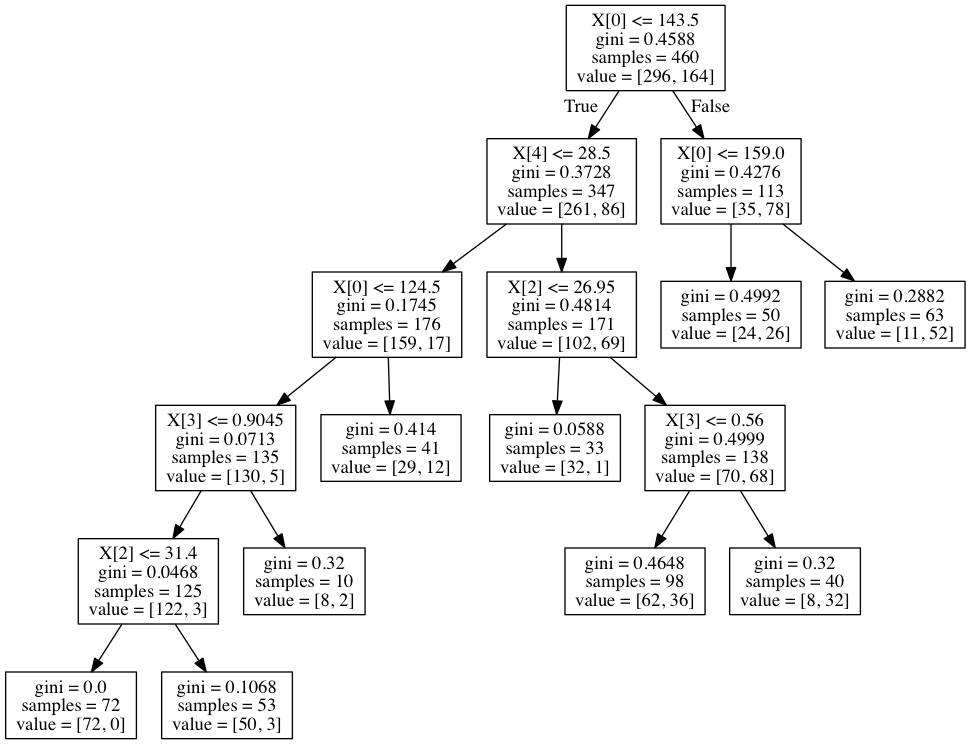

In [32]:
# Let's visualize the tree

out = StringIO()
tree.export_graphviz(model, out_file=out)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

In [33]:
print sklearn.metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       204
          1       0.66      0.55      0.60       104

avg / total       0.74      0.75      0.74       308



----

### Thank you kind stranger for reading! :)